In [10]:
!pip install mxnet
#!pip install gluoncv

  Using cached mxnet-1.7.0.post2-py2.py3-none-win_amd64.whl (33.1 MB)
  Using cached numpy-1.16.6.zip (5.1 MB)
  Using cached requests-2.18.4-py2.py3-none-any.whl (88 kB)
  Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
  Using cached urllib3-1.22-py2.py3-none-any.whl (132 kB)
  Using cached idna-2.6-py2.py3-none-any.whl (56 kB)
  Running setup.py clean for numpy
Failed to build numpy
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:


  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\salmansaeed.khan\\AppData\\Local\\Temp\\pip-install-4il8pk9k\\numpy\\setup.py'"'"'; __file__='"'"'C:\\Users\\salmansaeed.khan\\AppData\\Local\\Temp\\pip-install-4il8pk9k\\numpy\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\salmansaeed.khan\AppData\Local\Temp\pip-wheel-lebsvw_m'
       cwd: C:\Users\salmansaeed.khan\AppData\Local\Temp\pip-install-4il8pk9k\numpy\
  Complete output (264 lines):
  Running from numpy source directory.
  C:\Users\salmansaeed.khan\AppData\Local\Temp\pip-install-4il8pk9k\numpy\numpy\distutils\misc_util.py:476: SyntaxWarning: "is" with a literal. Did you mean "=="?
    return is_string(s) and ('*' in s or '?' is s)
  blas_opt_info:
  blas_mkl

In [4]:
#import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt
import numpy as np

ImportError: Unable to import modules due to missing `mxnet` & `torch`. You should install at least one deep learning framework.

In [2]:
image_url = 'https://raw.githubusercontent.com/zhreshold/mxnet-ssd/master/data/demo/dog.jpg'
image_filepath='dog.jpg'
gcv.utils.download(url=image_url, path=image_filepath)

'dog.jpg'

In [17]:
image_filepath='image_0.jpg'
#image_filepath='dog.jpg'

image = mx.image.imread(image_filepath)
print('shape:',image.shape)
print('data type:',image.dtype)
print('min value:',image.min().asscalar())
print('max value:',image.max().asscalar())

shape: (1536, 2048, 3)
data type: <class 'numpy.uint8'>
min value: 0
max value: 255


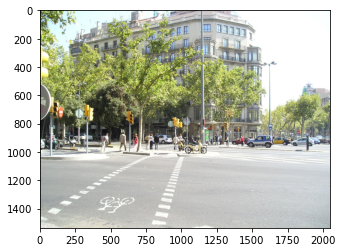

In [18]:
plt.imshow(image.asnumpy())

In [20]:
image, chw_image = gcv.data.transforms.presets.yolo.transform_test(image, short=512)
print('shape:',image.shape)
print('data type:',image.dtype)
print('min value:',image.min().asscalar())
print('max value:',image.max().asscalar())

shape: (1, 3, 512, 683)
data type: <class 'numpy.float32'>
min value: -2.117904
max value: 2.64


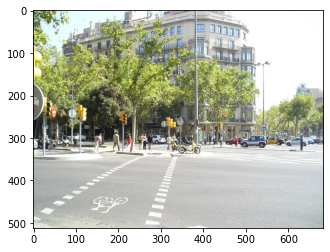

In [29]:
plt.imshow(chw_image)

In [10]:
network = gcv.model_zoo.get_model('yolo3_darknet53_coco', pretrained=True)

100%|██████████| 224190/224190 [00:04<00:00, 55462.83KB/s]


In [11]:
!ls -sh /home/ec2-user/.mxnet/models/yolo3_darknet53_coco*.params

237M /home/ec2-user/.mxnet/models/yolo3_darknet53_coco-09767802.params


In [30]:
prediction = network(image)
print(type(prediction))

for index, array in enumerate(prediction):
    print('#{} shape {}'.format(index+1, array.shape))
    
prediction = [array[0] for array in prediction]
class_indicies, probablities, bounding_boxes =  prediction

<class 'tuple'>
#1 shape (1, 100, 1)
#2 shape (1, 100, 1)
#3 shape (1, 100, 4)


In [97]:
#class_indicies
#probablities
#bounding_boxes
#network.classes
[np.asscalar(np.array(i[0])).item() for i in class_indicies]

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


AttributeError: 'NDArray' object has no attribute 'item'

In [60]:
print(bounding_boxes[0])
print(probablities[0])
print(class_indicies[0])

#network.classes
#gcv.data.transforms.bbox.crop(bounding_boxes[0])
#chw_image_cropped = chw_image[100:200, 300:400]
#plt.imshow(chw_image_cropped)
#bb= (bounding_boxes[0].astype(int))
#bb.item(1)
#chw_image_cropped = chw_image[bb[1]:bb[3] , bb[0]:bb[2]]
#plt.imshow(chw_image_cropped)
bounding_boxes[0:1]


[589.86725 298.0114  647.517   320.33405]
<NDArray 4 @cpu(0)>

[0.9694682]
<NDArray 1 @cpu(0)>

[2.]
<NDArray 1 @cpu(0)>



[[589.86725 298.0114  647.517   320.33405]]
<NDArray 1x4 @cpu(0)>

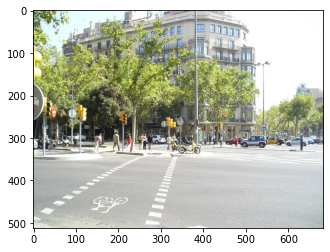

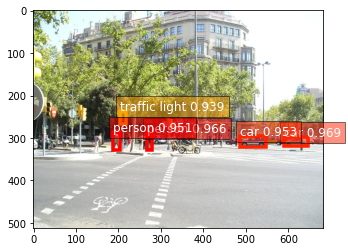

In [62]:
plt.imshow(chw_image)
image_bb_labeled = gcv.utils.viz.plot_bbox(chw_image, bounding_boxes[0:5],probablities[0:5],class_indicies[0:5], class_names=network.classes)